## Data visualisation

### Imports and constant definitions

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import random
import sklearn.metrics as sm
from functools import cmp_to_key
from sklearn import cluster
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
WORKING_DIRECTORY = "/Users/aymericschneider/Documents/Telecom/DataMining/Newgit/signature-recognition-MCYT-100"
os.chdir(WORKING_DIRECTORY)

### Display a signature
display the signature n°y of the signatory n°x 

In [5]:
def display_asignature(x,y) : # display the signature n°y of the signatory n°x 
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    print("Displaying the signature n°" + str(y) + " of the signatory n°" + str(x))
    df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
    X = df.X.to_numpy()
    Y = df.Y.to_numpy()
    P = df.P.to_numpy()
    idxs =  np.where(P==0)[0]
    
    
    pressure = P[0] > 0

    
    Xs_P, Ys_P = [],[] # sub arrays with pressure
    Xs_nP, Ys_nP = [],[] # sub arrays without pressure
    
    asubX,asubY = [],[] # temp array
    pressure = P[0] > 0 # init boolean pressure
    
    
    # Sub array defining
    for i in range(len(X)) :
        asubX.append(X[i])
        asubY.append(Y[i])
        if (i<len(X)-1) :
            nextpressure = P[i+1] > 0
            if pressure != nextpressure : # breaking point of the array in sub array
                if pressure :
                    Xs_P.append(asubX)
                    Ys_P.append(asubY)
                    asubX,asubY = [],[]
                    
                else :
                    Xs_nP.append(asubX)
                    Ys_nP.append(asubY)
                    asubX,asubY = [],[]
                pressure = nextpressure
    
    
    if pressure :
        Xs_P.append(asubX)
        Ys_P.append(asubY)
        asubX,asubY = [],[]
                    
    else :
        Xs_nP.append(asubX)
        Ys_nP.append(asubY)
        asubX,asubY = [],[]
                
    # Plotting lines (Trajectory with pressure)           
    for j in range(len(Xs_P)) :
        plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
    
    for k in range(len(Xs_nP)) :
        plt.plot(Xs_nP[k],Ys_nP[k], color = 'red', linestyle='dashed')
    
    
    plt.axis('equal')
    plt.show()
        
        
                    
        
      
 

    
    
    

    
    
    


Displaying the signature n°20 of the signatory n°15


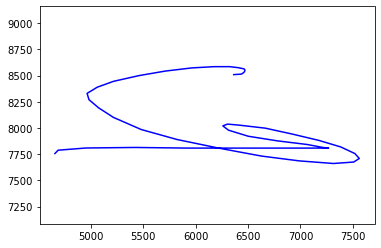

In [7]:
display_asignature(15,20)

### Displaying the set of signature of a signatory
display all the signatures of the signatory n°x 

In [8]:
def display_signatures(x) : # display all the signatures of the signatory n°x 
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    print("Displaying the signatures of the signatory n°" + str(x))
    
    plt.figure(figsize=(20,10))
    
    for y in range(25) :
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
        if pressure : 
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        plt.subplot(5,5,y+1)

       
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'red', linestyle='dashed')
        
        
        
    
    


    plt.axis('equal')
    plt.show()


Displaying the signatures of the signatory n°17


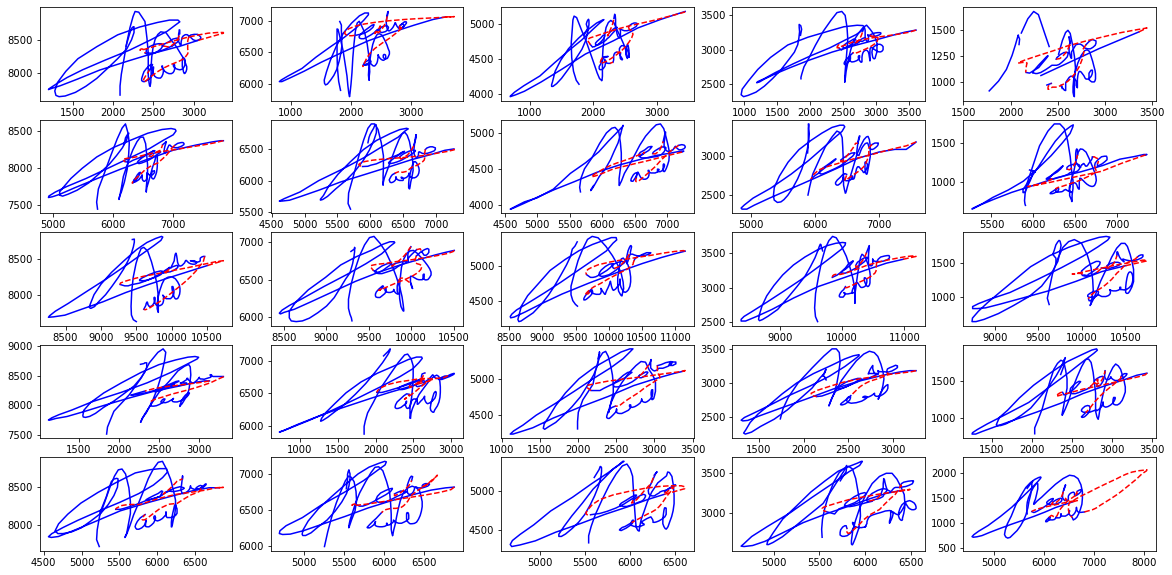

In [9]:
display_signatures(17)

## Experimental work

## Part 1 : 

### Mean complexity of a signatory

In [10]:
def mean_complexity(x,ng) : # compute the mean complexity of signatory n°x (from 0 to 99) with ng = 4,8,24
    os.chdir(WORKING_DIRECTORY)
    os.chdir("complexity")
   # df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
    df = pd.read_csv(str(ng)+'G.txt', header = None, delimiter = "\t")
    C = df.to_numpy()
    return C[x].mean()
    

    
    
    

In [11]:
mean_complexity(0,4)

31.046463491511542

In [12]:
def all_mean_complexity(ng) :  # compute and display all the mean complexity of signatory with ng = 4,8,24
    # print("signatory n° \t | \tmean complexity")
    mC = []
    for x in range(100) :
        # print(str(x) + " \t\t | \t" + str(mean_complexity(x,ng)))
        mC.append(["signatory n°" + str(x),mean_complexity(x,ng)])
    return mC
    
        
    
    

In [13]:
all_mean_complexity(4)

[['signatory n°0', 31.046463491511542],
 ['signatory n°1', 29.462412217232615],
 ['signatory n°2', 30.935473287697274],
 ['signatory n°3', 31.943561456913088],
 ['signatory n°4', 30.25015110948863],
 ['signatory n°5', 30.696174716703272],
 ['signatory n°6', 30.606420078815127],
 ['signatory n°7', 28.69650830656922],
 ['signatory n°8', 29.590734503332826],
 ['signatory n°9', 30.800599129785542],
 ['signatory n°10', 32.063459868364845],
 ['signatory n°11', 31.998059136715746],
 ['signatory n°12', 31.10513914973451],
 ['signatory n°13', 30.71014834930447],
 ['signatory n°14', 28.511153482911585],
 ['signatory n°15', 27.359313988007376],
 ['signatory n°16', 27.51096940203796],
 ['signatory n°17', 27.9989200565918],
 ['signatory n°18', 28.197705509544747],
 ['signatory n°19', 30.291925182655074],
 ['signatory n°20', 28.463889590774983],
 ['signatory n°21', 26.228741702200324],
 ['signatory n°22', 28.007107082227968],
 ['signatory n°23', 29.640042210040473],
 ['signatory n°24', 31.5779262329

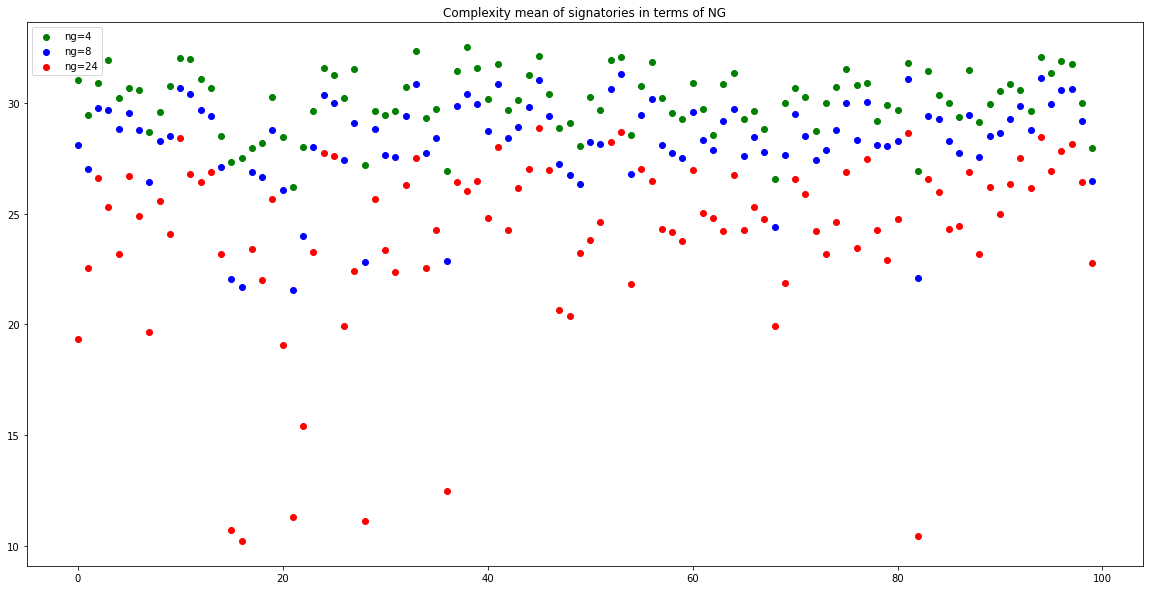

In [14]:
plt.figure(figsize=(20,10))

x = [i for i in range(100)]


ng4 = [v[1] for v in all_mean_complexity(4)]
ng8 = [v[1] for v in all_mean_complexity(8)]
ng24 = [v[1] for v in all_mean_complexity(24)]

plt.scatter(x,ng4,c='green')
plt.scatter(x,ng8,c='blue')
plt.scatter(x,ng24,c='red')

plt.title("Complexity mean of signatories in terms of NG")

plt.legend(["ng=4",'ng=8',"ng=24"])

plt.show()


### Unsupervised classification
k = 3

In [15]:
def display_clustering(algo) :
    (tab,centroids) = algo
    print("signatory n° \t\t | \tmean complexity \t\t | \tclass")
    for i in range(len(tab)) :
        print(str(tab[i][0]) + " \t\t | \t" + str(tab[i][1]) + " \t\t | \t" + str(tab[i][2]))
    Xr = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Yr = [0 for i in range(len(tab)) if tab[i][2] == 0]
    nr = len(Xr)
    Xg = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Yg = [0 for i in range(len(tab)) if tab[i][2] == 1]
    ng = len(Xg)
    Xb = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Yb = [0 for i in range(len(tab)) if tab[i][2] == 2]
    nb = len(Xb)
    n = nb + nr + ng
    plt.figure(figsize=(20,10))
    plt.title('Clustering',)
    plt.xlabel('Mean complexity')
    plt.scatter(Xr,Yr, c='red', marker='x')
    plt.legend(['A simple line'])
    plt.scatter(Xg,Yg, c='green', marker='x')
    plt.scatter(Xb,Yb, c='blue', marker='x')
    plt.legend(['red - cluster 0 : ' + str(nr) + ' signatories','green - cluster 1 : ' + str(ng) + ' signatories','blue - cluster 2 : ' + str(nb) + ' signatories'])

    plt.figure(figsize=(10,8))
    D = [nr/n,ng/n,nb/n] # Distributution
    plt.bar([0], [D[0]], 1, color='red' )
    plt.bar([1], [D[1]], 1, color='green' )
    plt.bar([2], [D[2]], 1, color='blue' )
    plt.legend(['red - cluster 0 : ' + str(round((nr/n)*100)) + '% of signatories','green - cluster 1 : ' + str(round((ng/n)*100)) + '% of signatories','blue - cluster 2 : ' + str(round((nb/n)*100)) + '% of signatories'])

    plt.title('Distribution between clusters')
    
    plt.show()
    

### Method 1 : K-Means with separate ng

In [16]:
def compare(x, y):
    return x[1] - y[1]


def k_means(ng) :
    mC = all_mean_complexity(ng)
    variables = [[v[1]] for v in mC]
    kmeans = cluster.KMeans(n_clusters=3).fit(variables) 
    for i in range(len(mC)):
        mC[i].append(kmeans.labels_[i])
    print("Silhouette score : "+ str(sm.silhouette_score(variables,kmeans.labels_)))
    return (sorted(mC, key=cmp_to_key(compare)),kmeans.cluster_centers_)
    
    
    

Silhouette score : 0.6016482383951687
signatory n° 		 | 	mean complexity 		 | 	class
signatory n°16 		 | 	10.200075586646918 		 | 	1
signatory n°82 		 | 	10.441122343239948 		 | 	1
signatory n°15 		 | 	10.691393552624085 		 | 	1
signatory n°28 		 | 	11.08732210631063 		 | 	1
signatory n°21 		 | 	11.297201142422173 		 | 	1
signatory n°36 		 | 	12.460724515778946 		 | 	1
signatory n°22 		 | 	15.410524216396537 		 | 	1
signatory n°20 		 | 	19.047779077533438 		 | 	2
signatory n°0 		 | 	19.336863422484964 		 | 	2
signatory n°7 		 | 	19.673326447619623 		 | 	2
signatory n°68 		 | 	19.918445853819716 		 | 	2
signatory n°26 		 | 	19.930386434372682 		 | 	2
signatory n°48 		 | 	20.399457314232013 		 | 	2
signatory n°47 		 | 	20.666880611769585 		 | 	2
signatory n°54 		 | 	21.833351048113528 		 | 	2
signatory n°69 		 | 	21.866314779095266 		 | 	2
signatory n°18 		 | 	21.993630928210283 		 | 	2
signatory n°31 		 | 	22.361831949792542 		 | 	2
signatory n°27 		 | 	22.404016217987564 		 | 	2
signat

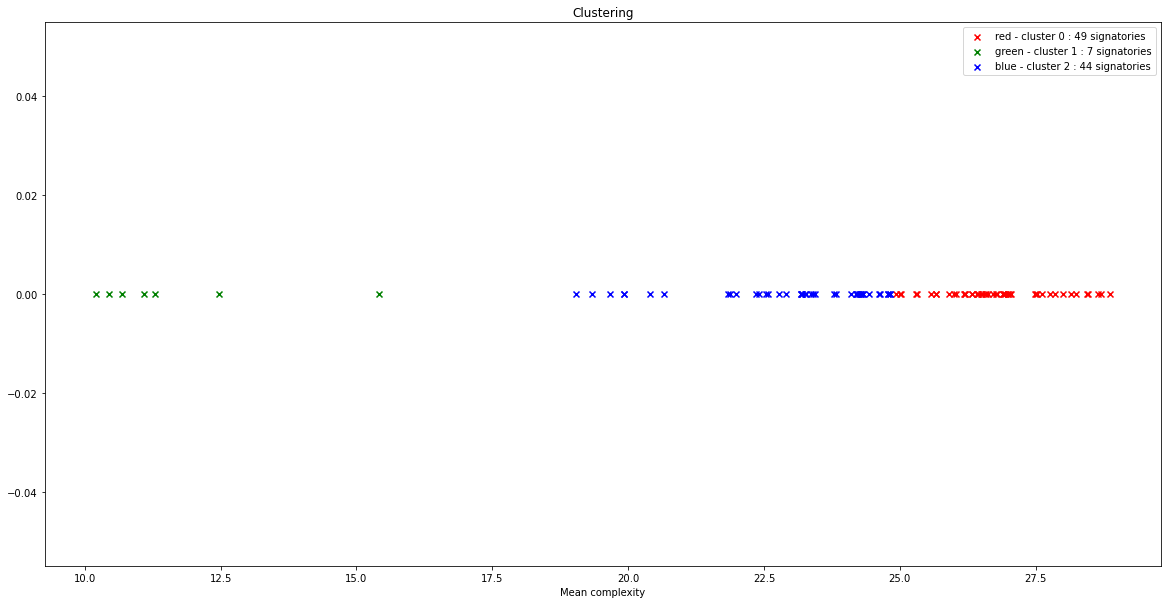

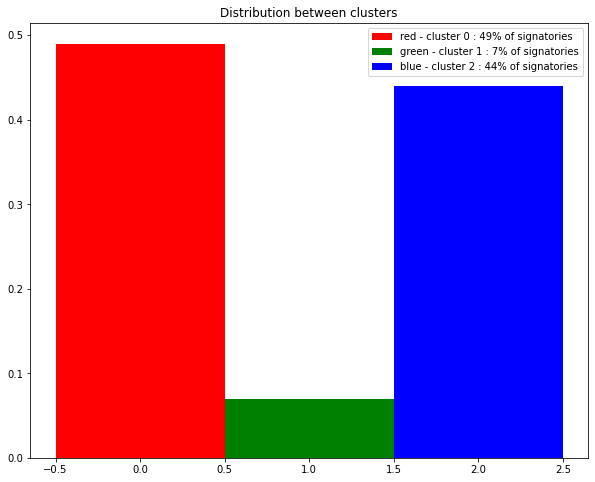

In [17]:
display_clustering(k_means(24))

### Method 2 : K-Medioid with separate ng

In [18]:
def compare(x, y):
    return x[1] - y[1]


def k_medoids(ng) :
    mC = all_mean_complexity(ng)
    variables = [[v[1]] for v in mC]
    kmedoids = KMedoids(n_clusters=3).fit(variables) 
    for i in range(len(mC)):
        mC[i].append(kmedoids.labels_[i])
    print("Silhouette score : "+ str(sm.silhouette_score(variables,kmedoids.labels_)))
    return (sorted(mC, key=cmp_to_key(compare)),kmedoids.cluster_centers_)
    

Silhouette score : 0.6107493039147726
signatory n° 		 | 	mean complexity 		 | 	class
signatory n°16 		 | 	10.200075586646918 		 | 	2
signatory n°82 		 | 	10.441122343239948 		 | 	2
signatory n°15 		 | 	10.691393552624085 		 | 	2
signatory n°28 		 | 	11.08732210631063 		 | 	2
signatory n°21 		 | 	11.297201142422173 		 | 	2
signatory n°36 		 | 	12.460724515778946 		 | 	2
signatory n°22 		 | 	15.410524216396537 		 | 	2
signatory n°20 		 | 	19.047779077533438 		 | 	0
signatory n°0 		 | 	19.336863422484964 		 | 	0
signatory n°7 		 | 	19.673326447619623 		 | 	0
signatory n°68 		 | 	19.918445853819716 		 | 	0
signatory n°26 		 | 	19.930386434372682 		 | 	0
signatory n°48 		 | 	20.399457314232013 		 | 	0
signatory n°47 		 | 	20.666880611769585 		 | 	0
signatory n°54 		 | 	21.833351048113528 		 | 	0
signatory n°69 		 | 	21.866314779095266 		 | 	0
signatory n°18 		 | 	21.993630928210283 		 | 	0
signatory n°31 		 | 	22.361831949792542 		 | 	0
signatory n°27 		 | 	22.404016217987564 		 | 	0
signat

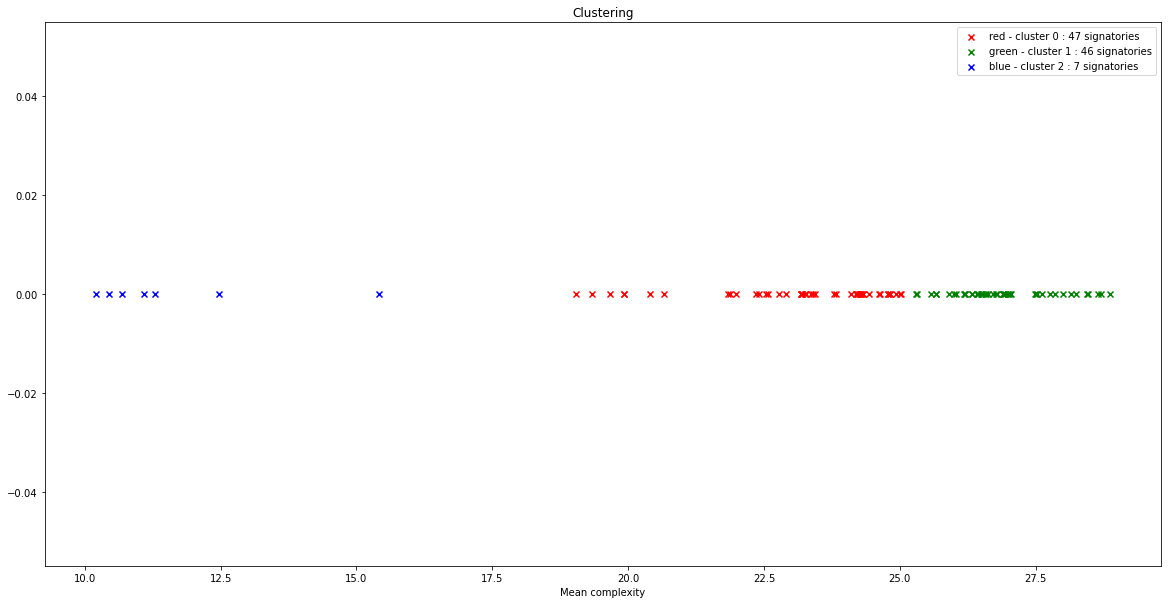

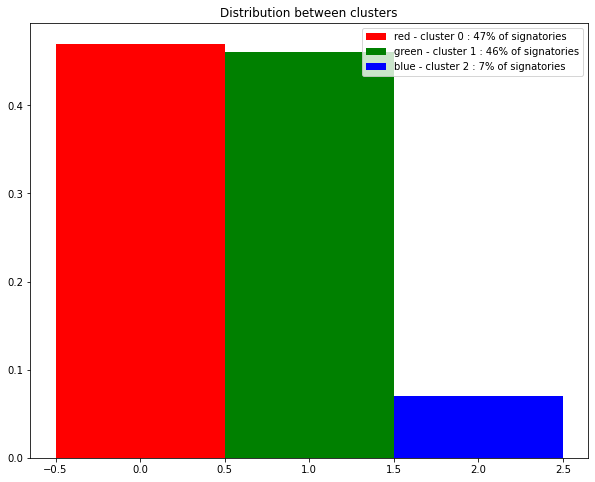

In [19]:
display_clustering(k_medoids(24))

### Intra and Inter class inertia

In [20]:
def d2(x,y) : 
    return (x-y)**2
    

def intra_class_inertia(tab,centroids) :

    sum = 0
    for cl in [0,1,2] :
        Cl = [v[1] for v in tab if v[2] == cl]
        nCl = len(Cl)
        sumcl = 0
        for e in Cl :
            sumcl += d2(e,centroids[cl][0])
        sum += sumcl
    return sum/len(tab)

def inter_class_inertia(tab,centroids) :
    g = np.mean([v[1] for v in tab])
    sum = 0
    for cl in [0,1,2] :
        Cl = [v[1] for v in tab if v[2] == cl]
        nCl = len(Cl)
        sum += nCl*d2(centroids[cl][0],g)
    return sum/len(tab)
        
     
    
    
    

In [21]:
(tab,centroids) = k_means(24)
g = np.mean([v[1] for v in tab])

print(intra_class_inertia(tab, centroids))
print(inter_class_inertia(tab, centroids))

Silhouette score : 0.6016482383951687
1.8303997120592153
14.91832071650127


### Clustering comparison

In [18]:
def display_comparison(algo) : #algo = k_means or k_medoids 
    plt.figure(figsize=(20,10))
    (tab,centroid4) = algo(4)
    intra4 = intra_class_inertia(tab, centroid4)
    inter4 = inter_class_inertia(tab, centroid4)
    
    n =len(tab)
    
    plt.subplot(3,1,1)
    R4 = [v for v in tab if v[2] == 0]
    G4 = [v for v in tab if v[2] == 1]
    B4 = [v for v in tab if v[2] == 2]
    
    X4r = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Y4r = [0 for i in range(len(tab)) if tab[i][2] == 0]
    X4g = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Y4g = [0 for i in range(len(tab)) if tab[i][2] == 1]
    X4b = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Y4b = [0 for i in range(len(tab)) if tab[i][2] == 2]
    
    n4r = len(X4r)
    n4g = len(X4g)
    n4b = len(X4b)

    plt.title('Clustering visualization NG=4',)
    
    
    
    
    plt.scatter(X4r,Y4r, c='red', marker='x')
    plt.scatter(X4g,Y4g, c='green', marker='x')
    plt.scatter(X4b,Y4b, c='blue', marker='x')
    plt.scatter(centroid4,[0,0,0], c='black', marker='d')
    plt.legend(['red - cluster 0 : ' + str(n4r) + ' signatories','green - cluster 1 : ' + str(n4g) + ' signatories','blue - cluster 2 : ' + str(n4b) + ' signatories'])
    
    
    (tab,centroid8) = algo(8)
    intra8 = intra_class_inertia(tab, centroid8)
    inter8 = inter_class_inertia(tab, centroid8)
    
    plt.subplot(3,1,2)
    
    R8 = [v for v in tab if v[2] == 0]
    G8 = [v for v in tab if v[2] == 1]
    B8 = [v for v in tab if v[2] == 2]
    
    X8r = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Y8r = [0 for i in range(len(tab)) if tab[i][2] == 0]
    X8g = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Y8g = [0 for i in range(len(tab)) if tab[i][2] == 1]
    X8b = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Y8b = [0 for i in range(len(tab)) if tab[i][2] == 2]
    
    n8r = len(X8r)
    n8g = len(X8g)
    n8b = len(X8b)

    plt.title('Clustering visualization NG=8',)
   
    plt.scatter(X8r,Y8r, c='red', marker='x')
    plt.scatter(X8g,Y8g, c='green', marker='x')
    plt.scatter(X8b,Y8b, c='blue', marker='x')
    plt.scatter(centroid8,[0,0,0], c='black', marker='d')
    plt.legend(['red - cluster 0 : ' + str(n8r) + ' signatories','green - cluster 1 : ' + str(n8g) + ' signatories','blue - cluster 2 : ' + str(n8b) + ' signatories'])
    
    (tab,centroid24) = algo(24)
    intra24 = intra_class_inertia(tab, centroid24)
    inter24 = inter_class_inertia(tab, centroid24)
    
    inertia = pd.DataFrame(data=np.array([[intra4,inter4],[intra8,inter8],[intra24,inter24]]),index=['ng=4','ng=8','ng=24'],columns=['Intra-inertia','Inter-inertia'])
    print(inertia)
    
    
    plt.subplot(3,1,3)
    
    R24 = [v for v in tab if v[2] == 0]
    G24 = [v for v in tab if v[2] == 1]
    B24 = [v for v in tab if v[2] == 2]
    
    X24r = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Y24r = [0 for i in range(len(tab)) if tab[i][2] == 0]
    X24g = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Y24g = [0 for i in range(len(tab)) if tab[i][2] == 1]
    X24b = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Y24b = [0 for i in range(len(tab)) if tab[i][2] == 2]
    n24r = len(X24r)
    n24g = len(X24g)
    n24b = len(X24b)
    
    
    plt.title('Clustering visualization NG=24',)
    plt.xlabel('Mean complexity')
    plt.scatter(X24r,Y24r, c='red', marker='x')
    plt.scatter(X24g,Y24g, c='green', marker='x')
    plt.scatter(X24b,Y24b, c='blue', marker='x')
    plt.scatter(centroid24,[0,0,0], c='black', marker='d')
    plt.legend(['red - cluster 0 : ' + str(n24r) + ' signatories','green - cluster 1 : ' + str(n24g) + ' signatories','blue - cluster 2 : ' + str(n24b) + ' signatories'])
    
    ## Diagram

    
    plt.figure(figsize=(20,10))
    
    plt.subplot(1,3,1)

    plt.bar([0], [n4r/n], 1, color='red' )
    plt.bar([1], [n4g/n], 1, color='green' )
    plt.bar([2], [n4b/n], 1, color='blue' )
    plt.title('Distribution between clusters NG=4')
    plt.legend(['red - cluster 0 : ' + str(round((n4r/n)*100)) + '% of signatories','green - cluster 1 : ' + str(round((n4g/n)*100)) + '% of signatories','blue - cluster 2 : ' + str(round((n4b/n)*100)) + '% of signatories'])
    
    plt.subplot(1,3,2)
    
    plt.bar([0], [n8r/n], 1, color='red' )
    plt.bar([1], [n8g/n], 1, color='green' )
    plt.bar([2], [n8b/n], 1, color='blue' )
    plt.title('Distribution between clusters NG=8')
    plt.legend(['red - cluster 0 : ' + str(round((n8r/n)*100)) + '% of signatories','green - cluster 1 : ' + str(round((n8g/n)*100)) + '% of signatories','blue - cluster 2 : ' + str(round((n8b/n)*100)) + '% of signatories'])
    
    plt.subplot(1,3,3)
    
    plt.bar([0], [n24r/n], 1, color='red' )
    plt.bar([1], [n24g/n], 1, color='green' )
    plt.bar([2], [n24b/n], 1, color='blue' )
    plt.title('Distribution between clusters NG=24')
    plt.legend(['red - cluster 0 : ' + str(round((n24r/n)*100)) + '% of signatories','green - cluster 1 : ' + str(round((n24g/n)*100)) + '% of signatories','blue - cluster 2 : ' + str(round((n24b/n)*100)) + '% of signatories'])
    
    ## Signature comparison

    batch = 5
    
    # ng = 4
    
    Sr = random.sample(R4, batch)
    Sg = random.sample(G4, batch)
    Sb = random.sample(B4, batch)
    
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    plt.figure(figsize=(20,10))
    
    # Cluster 0
    for ix in range(len(Sr)) :
        plt.subplot(3,batch,ix+1)
        x=Sr[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'red')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sr[ix][1]))])
        plt.axis('equal')
    

   # Cluster 1
    for ix in range(len(Sg)) :
        plt.subplot(3,batch,batch+ix+1)
        x=Sg[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'green')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sg[ix][1]))])
        plt.axis('equal')

    

   # Cluster 2
    for ix in range(len(Sb)) :
        plt.subplot(3,batch,2*batch+ix+1)
        x=Sb[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
        
        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sb[ix][1]))])
        plt.axis('equal')
        
# ng = 8
    
    Sr = random.sample(R8, batch)
    Sg = random.sample(G8, batch)
    Sb = random.sample(B8, batch)
    
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    plt.figure(figsize=(20,10))
    
    # Cluster 0
    for ix in range(len(Sr)) :
        plt.subplot(3,batch,ix+1)
        x=Sr[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'red')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sr[ix][1]))])
        plt.axis('equal')
    

   # Cluster 1
    for ix in range(len(Sg)) :
        plt.subplot(3,batch,batch+ix+1)
        x=Sg[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'green')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sg[ix][1]))])
        plt.axis('equal')

    

   # Cluster 2
    for ix in range(len(Sb)) :
        plt.subplot(3,batch,2*batch+ix+1)
        x=Sb[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
        
        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sb[ix][1]))])
        plt.axis('equal')
        
# ng = 24
    
    Sr = random.sample(R24, batch)
    Sg = random.sample(G24, batch)
    Sb = random.sample(B24, batch)
    
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    plt.figure(figsize=(20,10))
    
    # Cluster 0
    for ix in range(len(Sr)) :
        plt.subplot(3,batch,ix+1)
        x=Sr[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'red')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sr[ix][1]))])
        plt.axis('equal')
    

   # Cluster 1
    for ix in range(len(Sg)) :
        plt.subplot(3,batch,batch+ix+1)
        x=Sg[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'green')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sg[ix][1]))])
        plt.axis('equal')

    

   # Cluster 2
    for ix in range(len(Sb)) :
        plt.subplot(3,batch,2*batch+ix+1)
        x=Sb[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
        
        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sb[ix][1]))])
        plt.axis('equal')
        
        ## END Signature comparison

    
    plt.show()

### Kmeans

Silhouette score : 0.5672909107035964
Silhouette score : 0.6151930928181053
Silhouette score : 0.604637411897198
       Intra-inertia  Inter-inertia
ng=4        0.300819       1.683320
ng=8        0.508482       3.781753
ng=24       1.830438      14.918282


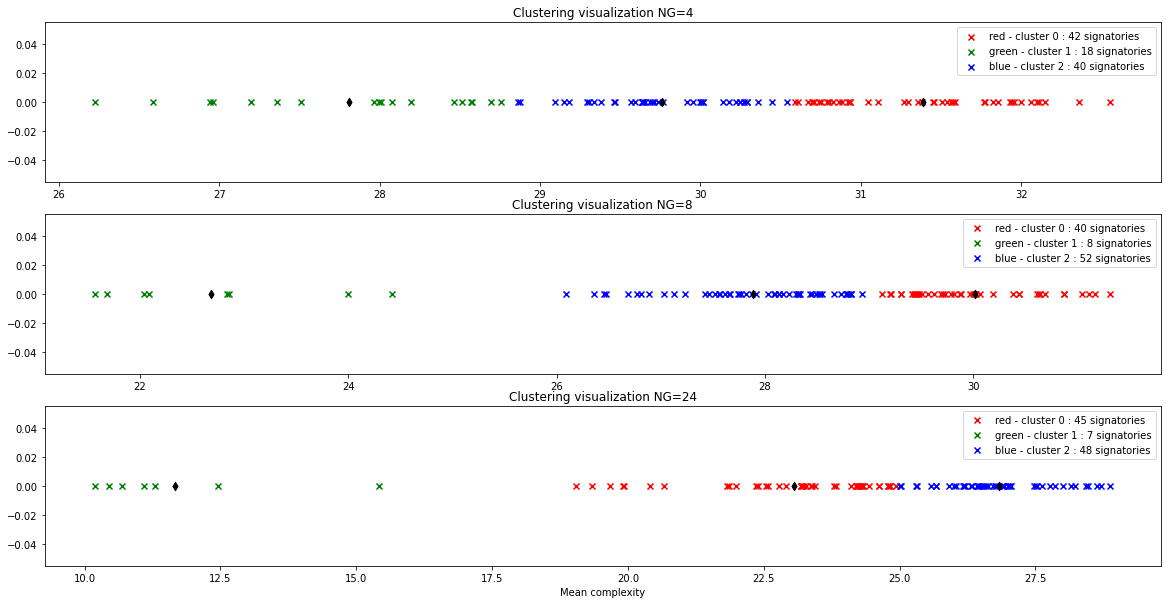

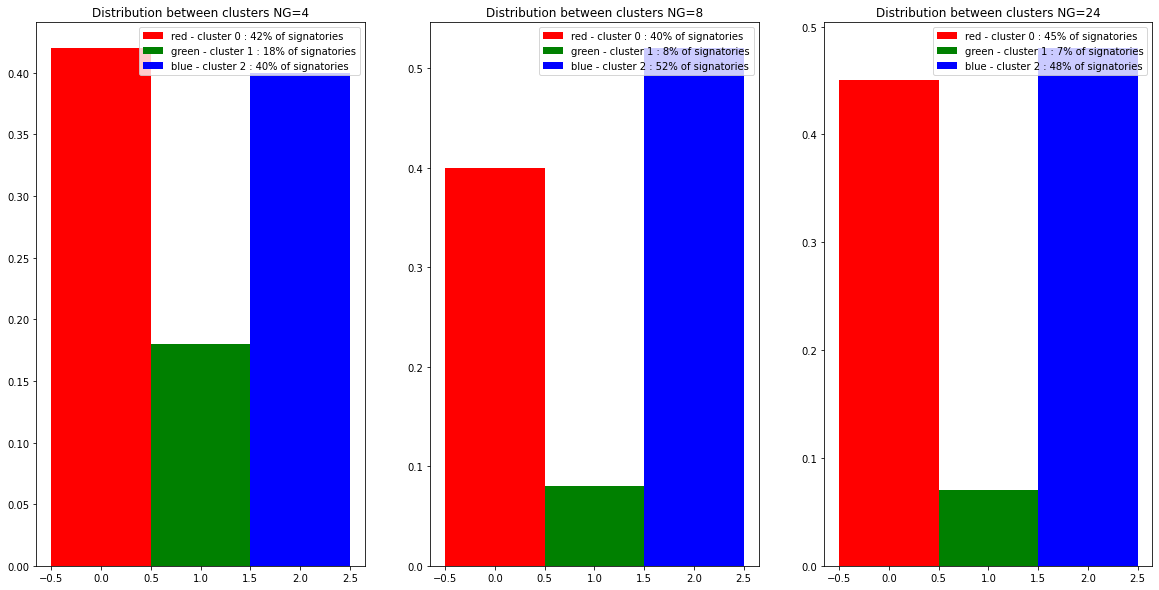

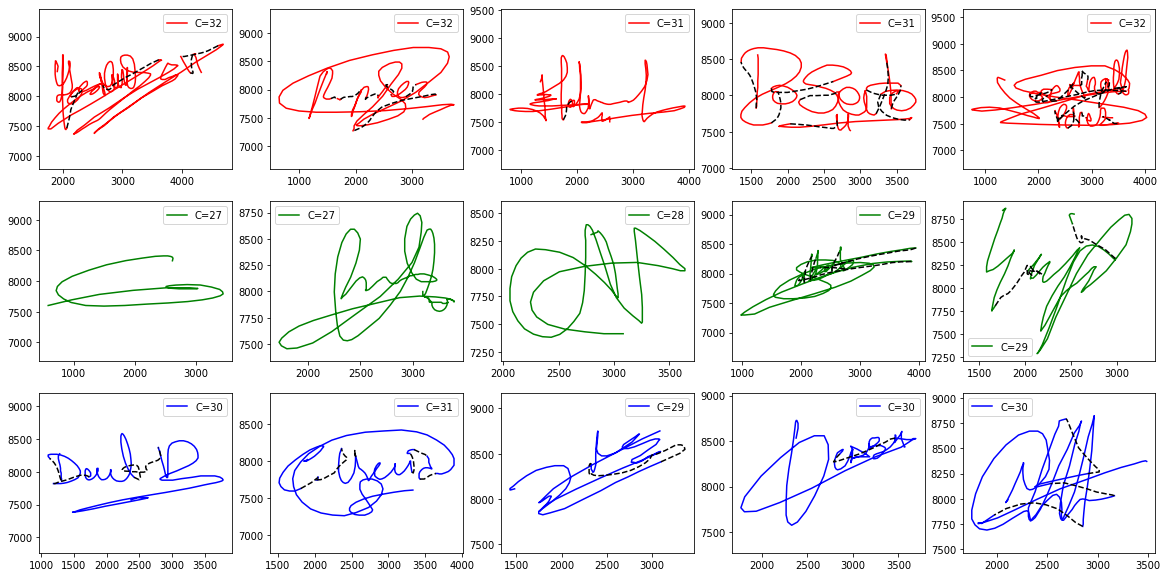

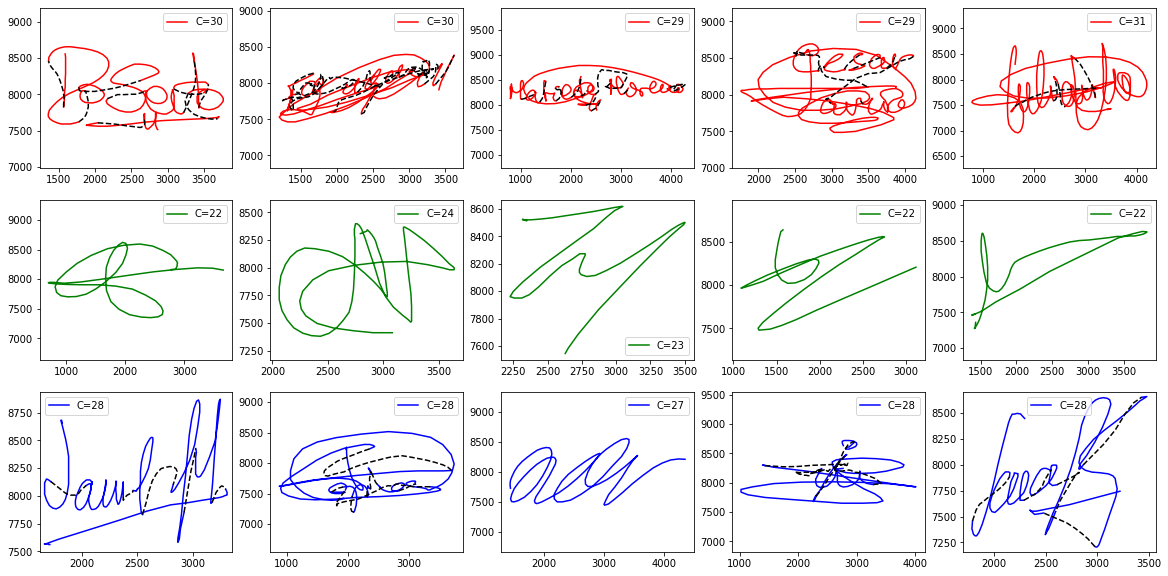

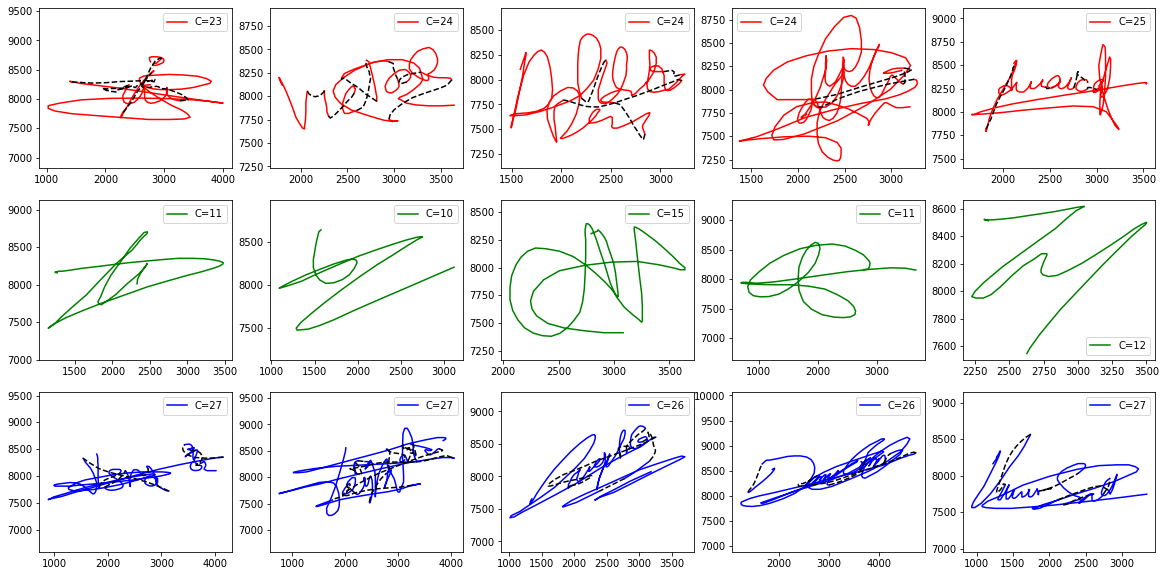

In [19]:
display_comparison(k_means)

### Kmedoid

Silhouette score : 0.5365845517758472
Silhouette score : 0.5225191436764349
Silhouette score : 0.6107493039147726
       Intra-inertia  Inter-inertia
ng=4        0.365841       1.458178
ng=8        1.424061       1.692380
ng=24       1.895046      15.401729


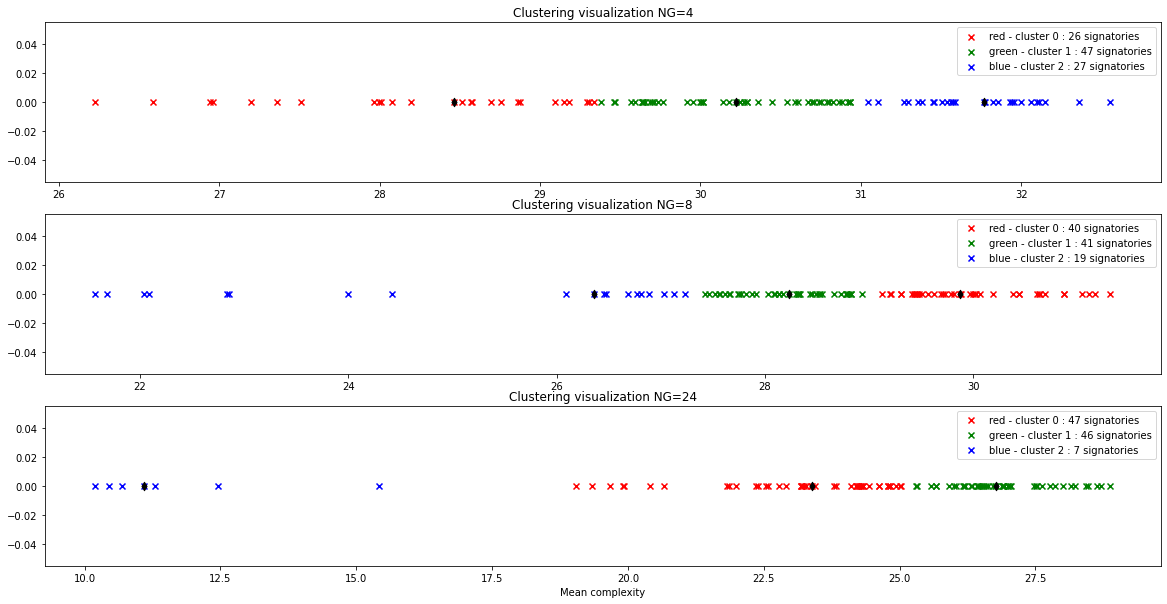

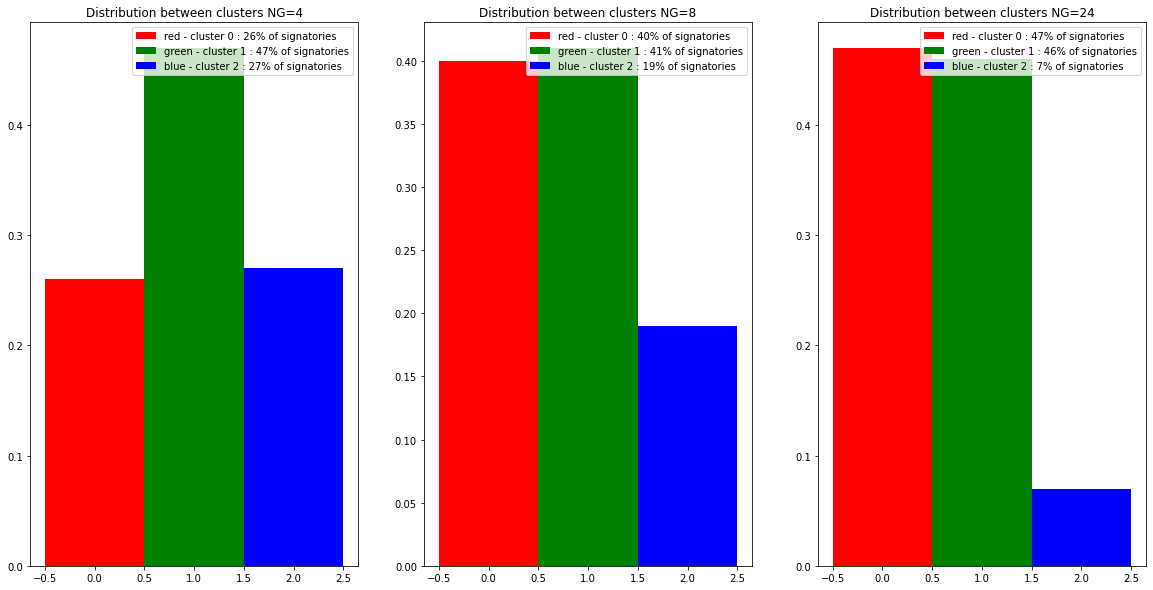

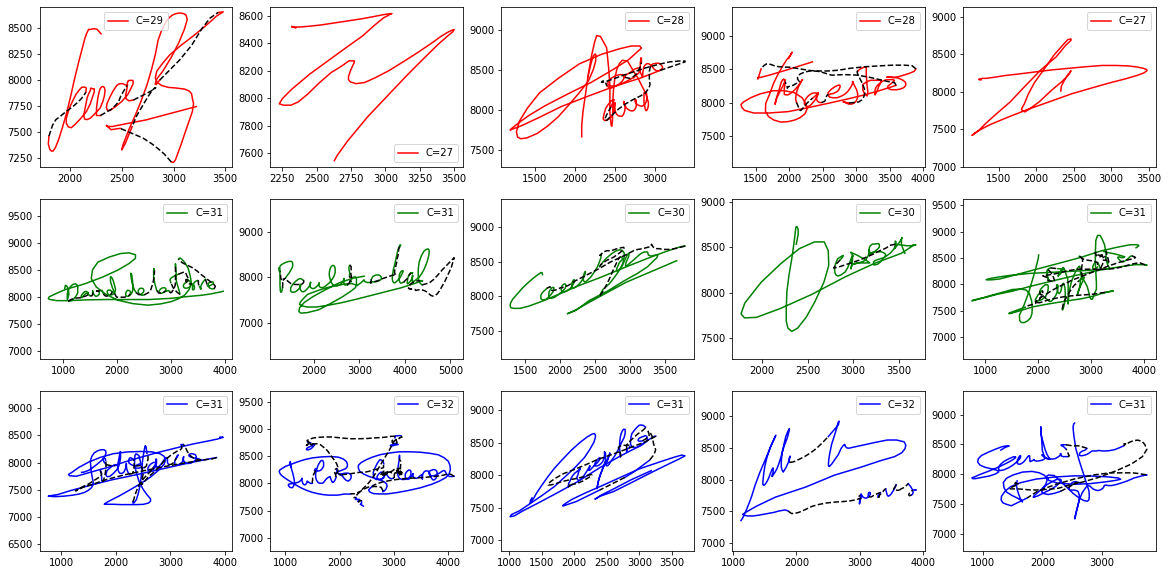

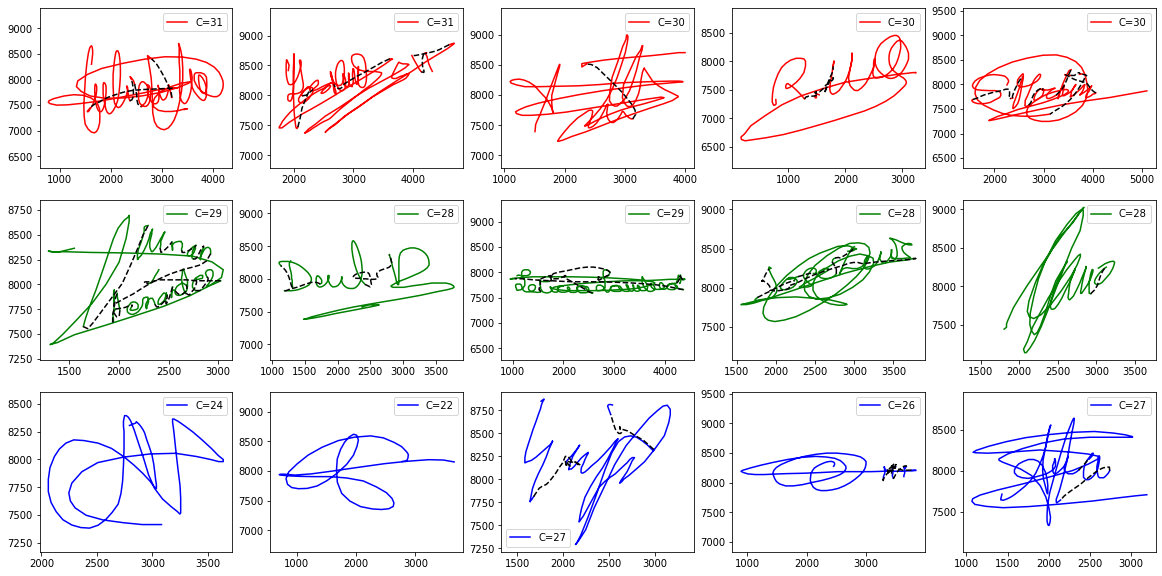

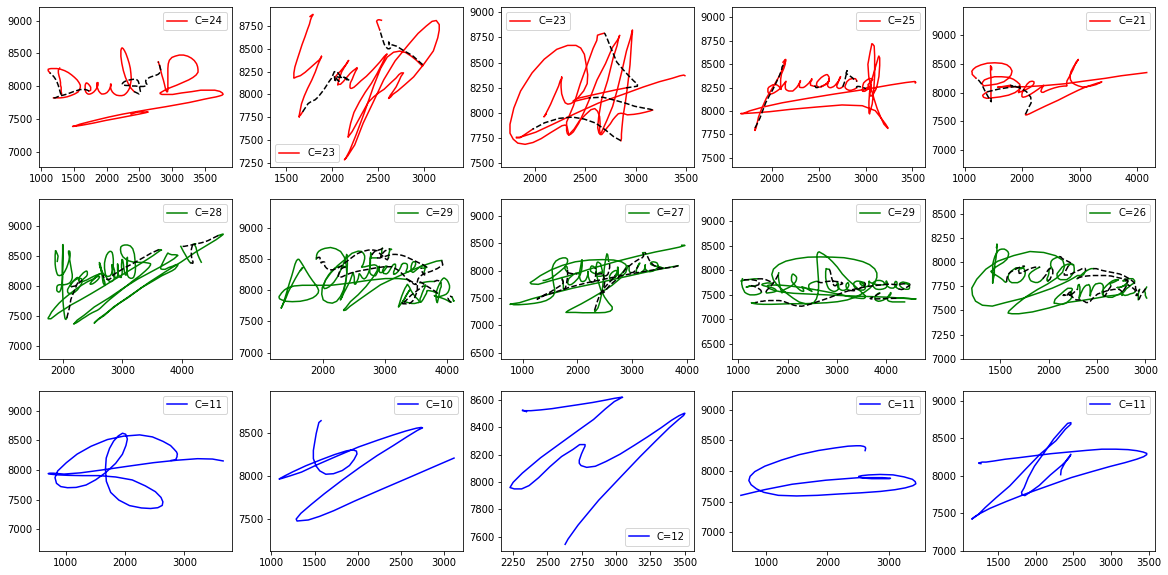

In [20]:
display_comparison(k_medoids)

## Part 2

### Getting the complexity matrix of 24G

In [21]:
def get_complexity24G() :
    os.chdir(WORKING_DIRECTORY)
    os.chdir("complexity")
    # df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
    df = pd.read_csv('24G.txt', header = None, delimiter = "\t")

    C = df.to_numpy()
    return C


In [22]:
get_complexity24G()

array([[19.41837917, 21.16804097, 17.97811414, ..., 17.91596294,
        19.75401384, 17.68968057],
       [23.89153231, 21.41009405, 22.21716874, ..., 20.84471413,
        23.126296  , 21.37849291],
       [26.78153178, 27.12594194, 26.78390292, ..., 26.47531645,
        26.15815696, 25.31740207],
       ...,
       [27.5482351 , 28.02190322, 28.98064228, ..., 27.91460136,
        28.36797118, 27.60425063],
       [25.66342926, 26.68171021, 25.71476994, ..., 27.0099219 ,
        26.47527747, 26.14056506],
       [24.75389247, 22.32664027, 23.54342033, ..., 22.4602686 ,
        20.61011107, 20.7058419 ]])

### Associating each signature xvy to its complexity

In [23]:
def get_complexity_signatures_tab() :
    C = get_complexity24G()
    tab = []
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    for x in range(100) :
        for y in range(25) :
            tab.append([x,y,C[x][y]])
    return tab
            
    

In [24]:
get_complexity_signatures_tab()

[[0, 0, 19.4183791733071],
 [0, 1, 21.1680409746232],
 [0, 2, 17.9781141386921],
 [0, 3, 20.3498100329553],
 [0, 4, 18.9587497290952],
 [0, 5, 17.8805970286835],
 [0, 6, 20.276367347782],
 [0, 7, 23.2072891377551],
 [0, 8, 19.794415507648],
 [0, 9, 19.3198059132879],
 [0, 10, 19.0407418203246],
 [0, 11, 19.1072566262008],
 [0, 12, 19.3729599852317],
 [0, 13, 20.7617709167892],
 [0, 14, 20.4431873162614],
 [0, 15, 18.5740538645699],
 [0, 16, 17.278134531521],
 [0, 17, 19.5412063956489],
 [0, 18, 17.4147971089666],
 [0, 19, 20.118962744818],
 [0, 20, 17.52206238383],
 [0, 21, 20.5352255362678],
 [0, 22, 17.9159629374058],
 [0, 23, 19.7540138374252],
 [0, 24, 17.6896805730338],
 [1, 0, 23.8915323112409],
 [1, 1, 21.4100940463013],
 [1, 2, 22.2171687371491],
 [1, 3, 19.4884789619339],
 [1, 4, 21.5917561662867],
 [1, 5, 25.0322449046523],
 [1, 6, 23.5988775652904],
 [1, 7, 24.5553374261018],
 [1, 8, 22.0850593660793],
 [1, 9, 25.0364971903778],
 [1, 10, 22.7621881831891],
 [1, 11, 22.807787

### Clustering signature writer-independent

In [29]:
def writer_independent_clustering() :
    tab = get_complexity_signatures_tab()
    variables = [[v[2]] for v in tab]
    kmedoids = KMedoids(n_clusters=3).fit(variables) 
    for i in range(len(tab)):
        tab[i].append(kmedoids.labels_[i])
    return (tab,kmedoids.cluster_centers_)
    

In [30]:
writer_independent_clustering()

([[0, 0, 19.4183791733071, 0],
  [0, 1, 21.1680409746232, 0],
  [0, 2, 17.9781141386921, 0],
  [0, 3, 20.3498100329553, 0],
  [0, 4, 18.9587497290952, 0],
  [0, 5, 17.8805970286835, 0],
  [0, 6, 20.276367347782, 0],
  [0, 7, 23.2072891377551, 0],
  [0, 8, 19.794415507648, 0],
  [0, 9, 19.3198059132879, 0],
  [0, 10, 19.0407418203246, 0],
  [0, 11, 19.1072566262008, 0],
  [0, 12, 19.3729599852317, 0],
  [0, 13, 20.7617709167892, 0],
  [0, 14, 20.4431873162614, 0],
  [0, 15, 18.5740538645699, 0],
  [0, 16, 17.278134531521, 1],
  [0, 17, 19.5412063956489, 0],
  [0, 18, 17.4147971089666, 1],
  [0, 19, 20.118962744818, 0],
  [0, 20, 17.52206238383, 1],
  [0, 21, 20.5352255362678, 0],
  [0, 22, 17.9159629374058, 0],
  [0, 23, 19.7540138374252, 0],
  [0, 24, 17.6896805730338, 1],
  [1, 0, 23.8915323112409, 0],
  [1, 1, 21.4100940463013, 0],
  [1, 2, 22.2171687371491, 0],
  [1, 3, 19.4884789619339, 0],
  [1, 4, 21.5917561662867, 0],
  [1, 5, 25.0322449046523, 2],
  [1, 6, 23.5988775652904, 0],

### Clustering signature writer-independent distributution among clusters

In [31]:
def wi_distribution_clusters() :
    (tab,centroids) = writer_independent_clustering()
    print(centroids)
    n=len(tab)

    nr = len([v for v in tab if v[3]==0])
    ng = len([v for v in tab if v[3]==1])
    nb = len([v for v in tab if v[3]==2])
    
    nA = [0,0,0]
    

    sD = [ [0,0,0] for i in range(100) ] # Signatory distribution among clusters
    for e in tab :
        sD[e[0]][e[3]] += 1
    plt.figure(figsize=(20,50))
    
    for i in range(len(sD)) :
        plt.subplot(20,5,i+1)
        plt.bar([0], [sD[i][0]/25], 1, color='red' )
        plt.bar([1], [sD[i][1]/25], 1, color='green' )
        plt.bar([2], [sD[i][2]/25], 1, color='blue' )
        plt.title('Signatory n°' + str(i))
        #plt.legend(['red - cluster 0 : ' + str(round((sD[i][0]/25)*100)) + '% of signatories','green - cluster 1 : ' + str(round((sD[i][1]/25)*100)) + '% of signatories','blue - cluster 2 : ' + str(round((sD[i][2]/25)*100)) + '% of signatories'])
    
    L = [[0,0,0],[0,0,0]]
    for j in range(100) :
        if not(sD[j][0] == 25 or sD[j][1] == 25 or sD[j][2] == 25) :
            
            if max(sD[j]) == sD[j][0] :
                nA[0] += 1
            elif max(sD[j]) == sD[j][1] :
                nA[1] += 1
            else :
                nA[2] += 1
              
    plt.figure(figsize=(10,5))
    plt.bar([0], [sum(nA)/100], 1, color='red' )
    plt.bar([1], [(100-sum(nA))/100], 1, color='lime' )
    plt.title('Variable signatory')
    plt.legend(['Not perfectly clusterized','Perfectly clusterized'])
    
    plt.figure(figsize=(20,10))
    
    plt.bar([0], [nA[0]/100], 1, color='red' )
    plt.bar([1], [nA[1]/100], 1, color='green' )
    plt.bar([2], [nA[2]/100], 1, color='blue' )
    plt.title('Variable signatory per cluster')
    plt.legend(['Cluster 0 not perfectly clusterized','Cluster 1 not perfectly clusterized','Cluster 2 not perfectly clusterized'])
    

    
        
    
    
    
    
    
    plt.show()
    
 
        
        
    
        
        
        
        

[[23.20197181]
 [12.24168999]
 [26.61026436]]


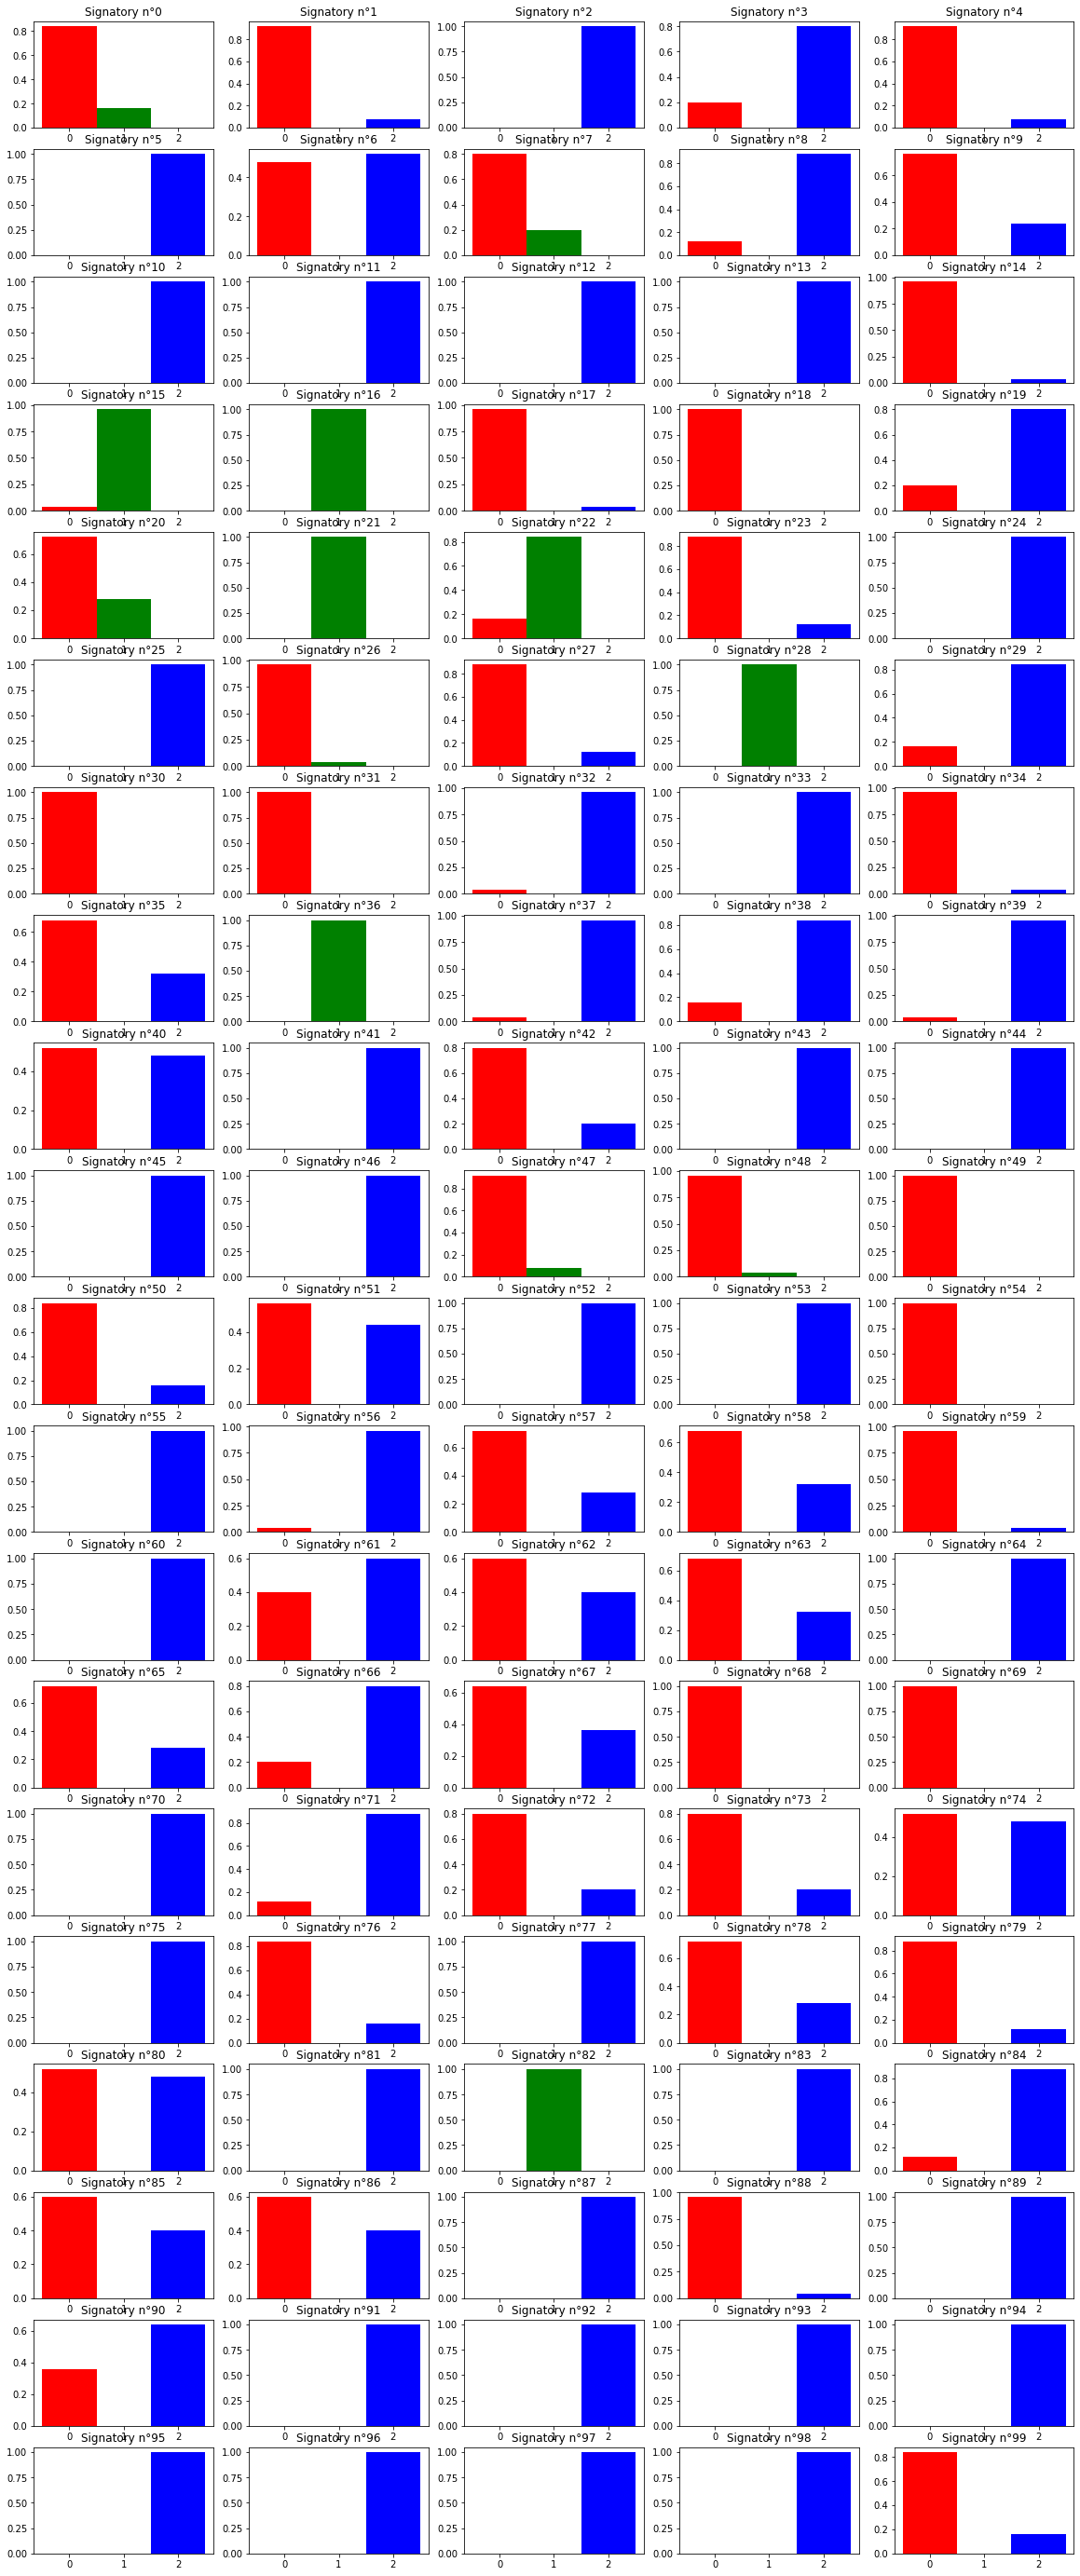

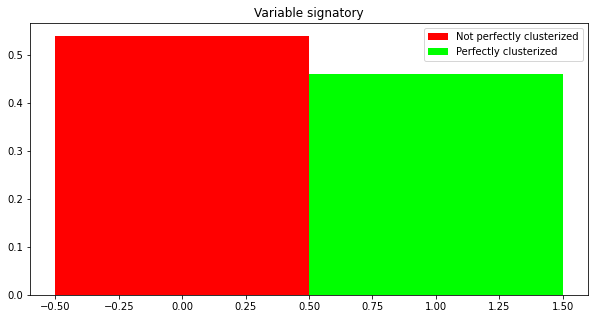

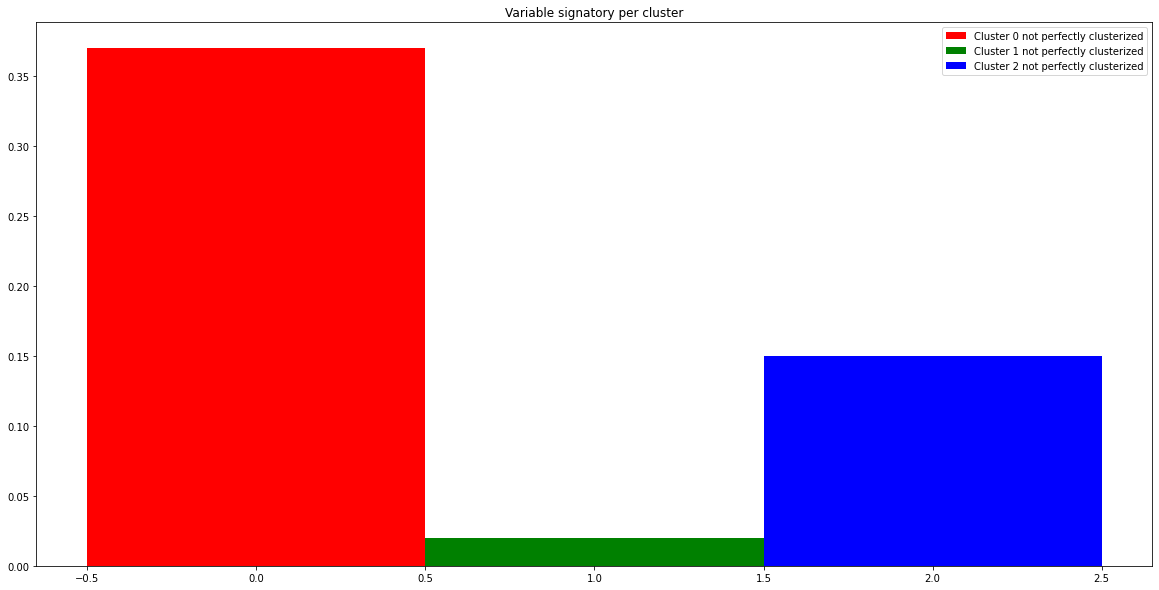

In [28]:
wi_distribution_clusters() 

## Part 3

### Dividing in half the DB

In [ ]:
def comparetab(x,y) : 
    if x[0]-y[0] == 0 : return x[1]-y[1]
    else : return x[0]-y[0]

def dividing_db() :
    tab_L = get_complexity_signatures_tab()
    tab_T = []
    for i in range(1250) :
        tab_T.append(tab_L.pop(random.randint(0,len(tab_L)-1)))
    return (tab_L,sorted(tab_T,key=cmp_to_key(comparetab)))
        
  

In [ ]:
dividing_db()

### Learning

### Finding the centroids among the learning data

In [ ]:
def learning_data_centroids(tab) :
    variables = [[v[2]] for v in tab]
    kmedoids = KMedoids(n_clusters=3).fit(variables) 
    for i in range(len(tab)):
        tab[i].append(kmedoids.labels_[i])
    return (tab,kmedoids.cluster_centers_)

In [ ]:
learning_data_centroids(dividing_db()[0])[1]

In [ ]:

def test_data_clustering(tab_T,centroids) :
    for e in tab_T :
        distances = [(centroids[i][0] - e[2])**2 for i in range(3)]
        dmin = min(distances)
        if distances[0] == dmin :
            e.append(0)
        elif distances[1] == dmin :
            e.append(1)
        else :
            e.append(2)
    return tab_T

In [ ]:
centroidsPart3 = learning_data_centroids(dividing_db()[0])[1]
tab_T = dividing_db()[1]
test_data_clustering(tab_T,centroidsPart3)

In [ ]:
(tabPart2,centroidsPart2) = writer_independent_clustering()
centroidsPart2,centroidsPart3

def matching_centroids3to2(centroidsPart2,centroidsPart3) :
       # print((centroidsPart2,centroidsPart3))
        mV = [] # matching vector for centroidsPart2 to centroidsPart3
        for i in range(len(centroidsPart3)) :
            distances = [(centroidsPart2[j][0] - centroidsPart3[i][0])**2 for j in range(3)]
            dmin = min(distances)
            if distances[0] == dmin :
                mV.append(0)
            elif distances[1] == dmin :
                mV.append(1)
            else :
                mV.append(2)
        return mV
    
    

In [ ]:
matching_centroids3to2(centroidsPart2,centroidsPart3)

In [ ]:
def matching_clusters3to2(tab3,mV) :
    for e in tab3  :
        e[3] = mV[e[3]]
    return tab3
    

In [75]:
def comparing_p2_and_p3() :
    
    # PART 3 DATA
    (tab_L,tab_T) = dividing_db()
    tab_Lcl,centroidsPart3 = learning_data_centroids(tab_L)
    tab_Tcl = test_data_clustering(tab_T,centroidsPart3)
    # print(centroidsPart2)
    
    # PART 2 DATA
    (tabPart2,centroidsPart2) = writer_independent_clustering()
    print(centroidsPart2)
    
    # MATCHING CENTROIDS BETWEEN PART 2 AND PART3, PART2 centroids are taken as reference
    mV = matching_centroids3to2(centroidsPart2,centroidsPart3) # matching vector
    # print(mV)
    
    # MATCHING CLUSTERS OF PART 3 TO 2 ACCORDING TO CENTROIDS MATCH
    tab_Tcl = matching_clusters3to2(tab_Tcl,mV)
    tab_Lcl = matching_clusters3to2(tab_Lcl,mV)
    # print(tab_Tcl)

    # COMPARING CLUSTERIZATION BETWEEN PART2 AND PART3
    T = []
    for e in tab_Tcl :
        ePart2 = [v for v in tabPart2 if v[0]==e[0] and v[1]==e[1]][0]
        # print(str(e[0]) + 'v' + str(e[1]) + " : \t\t"+str(ePart2[3])+"\t"+str(e[3]))
        T.append([e[0],e[1],ePart2[3],e[3]])
    
    # dfT = pd.DataFrame(data=np.array(T),columns=['x','y','p2 cluster','p3 cluster'])
    # print(dfT) 
    
    # CLUSTER VISUALISATION
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(3,1,1)
    
    plt.title('Clustering visualization 24G - Part 2',)
  
    Xp2r = [v[2] for v in tabPart2 if v[3]==0]
    Yp2r = [0 for x in Xp2r]
    
    Xp2g = [v[2] for v in tabPart2 if v[3]==1]
    Yp2g = [0 for x in Xp2g]
    
    Xp2b = [v[2] for v in tabPart2 if v[3]==2]
    Yp2b = [0 for x in Xp2b]
    
    plt.scatter(Xp2r,Yp2r, c='red', marker='x')
    plt.scatter(Xp2g,Yp2g, c='green', marker='x')
    plt.scatter(Xp2b,Yp2b, c='blue', marker='x')
    plt.scatter(centroidsPart2,[0,0,0], c='black', marker='d')
    plt.legend(['red - cluster 0 : ' + str(len(Xp2r)) + ' signatories','green - cluster 1 : ' + str(len(Xp2g)) + ' signatories','blue - cluster 2 : ' + str(len(Xp2b)) + ' signatories'])
  
    plt.subplot(3,1,2)
    
    plt.title('Clustering visualization 24G - Part 3 - Learning set',)
  
    Xp3lr = [v[2] for v in tab_Lcl if v[3]==0]
    Yp3lr = [0 for x in Xp3lr]
    
    Xp3lg = [v[2] for v in tab_Lcl if v[3]==1]
    Yp3lg = [0 for x in Xp3lg]
    
    Xp3lb = [v[2] for v in tab_Lcl if v[3]==2]
    Yp3lb = [0 for x in Xp3lb]
    
    plt.scatter(Xp3lr,Yp3lr, c='red', marker='x')
    plt.scatter(Xp3lg,Yp3lg, c='green', marker='x')
    plt.scatter(Xp3lb,Yp3lb, c='blue', marker='x')
    plt.scatter(centroidsPart3,[0,0,0], c='black', marker='d')
    plt.legend(['red - cluster 0 : ' + str(len(Xp3lr)) + ' signatories','green - cluster 1 : ' + str(len(Xp3lg)) + ' signatories','blue - cluster 2 : ' + str(len(Xp3lb)) + ' signatories'])

    plt.subplot(3,1,3)
    
    plt.title('Clustering visualization 24G - Part 3 - Testing set',)
  
    Xp3tr = [v[2] for v in tab_Tcl if v[3]==0]
    Yp3tr = [0 for x in Xp3tr]
    
    Xp3tg = [v[2] for v in tab_Tcl if v[3]==1]
    Yp3tg = [0 for x in Xp3tg]
    
    Xp3tb = [v[2] for v in tab_Tcl if v[3]==2]
    Yp3tb = [0 for x in Xp3tb]
    
    plt.scatter(Xp3tr,Yp3tr, c='red', marker='x')
    plt.scatter(Xp3tg,Yp3tg, c='green', marker='x')
    plt.scatter(Xp3tb,Yp3tb, c='blue', marker='x')
    plt.scatter(centroidsPart3,[0,0,0], c='black', marker='d')
    plt.legend(['red - cluster 0 : ' + str(len(Xp3tr)) + ' signatories','green - cluster 1 : ' + str(len(Xp3tg)) + ' signatories','blue - cluster 2 : ' + str(len(Xp3tb)) + ' signatories'])

    
    # ERROR RATE
    
    ER = [[0 for j in range(3)] for i in range(3)]

    for e in T :
        if e[2] != e[3] :
            ER[e[2]][e[3]] += 1
    
    print(ER)
        
    

[[23.20197181]
 [12.24168999]
 [26.61026436]]
[[0, 0, 0], [109, 0, 0], [93, 0, 0]]


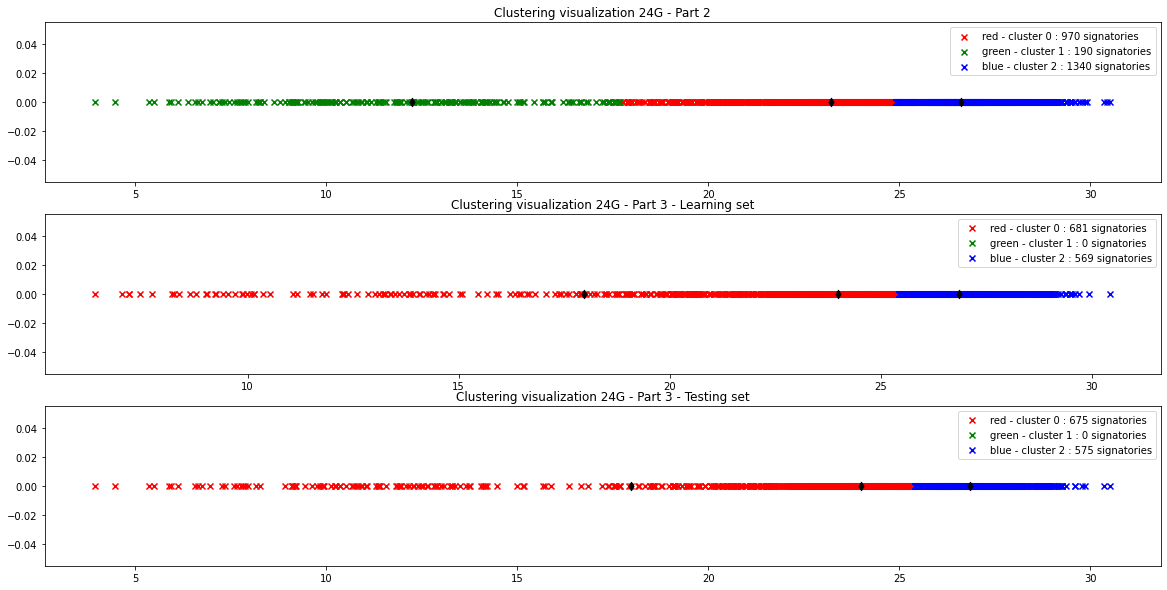

In [76]:
comparing_p2_and_p3()